Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Train Accuracy: 1.0000
Test Accuracy: 0.9643
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1
          13    

/Users/aninditatripathy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aninditatripathy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aninditatripathy/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

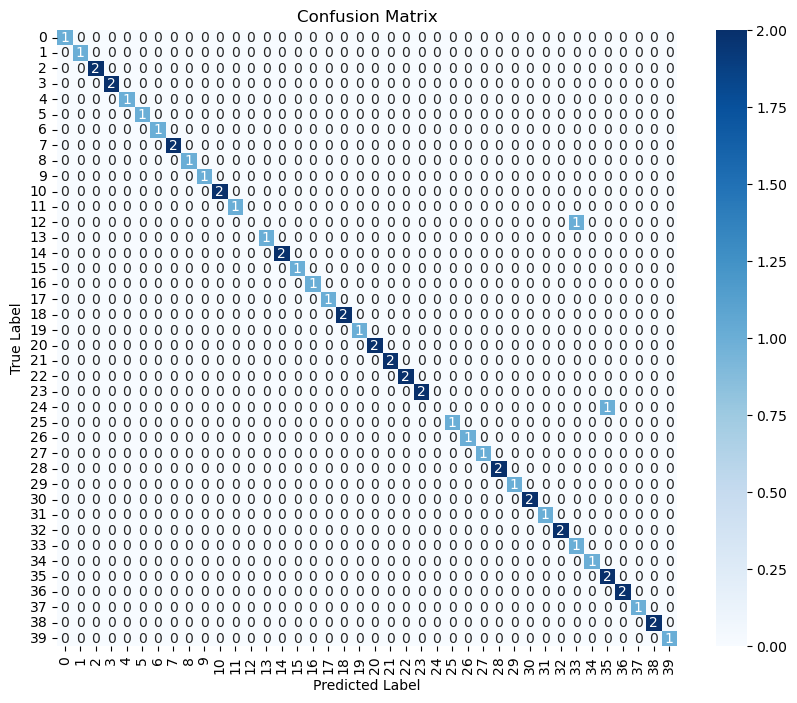

In [4]:
# KNN for 15m

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting

# Load the dataset from the CSV file
data = pd.read_csv('norm_newfocus15m.csv')  # Replace with the actual file name

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the data
balanced_data = balance_data(data)

# Split the data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the K-nearest neighbors classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # How to weigh the votes of each neighbor
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_knn = grid_search.best_estimator_
print(f"Best KNN Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_knn.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_knn.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Train Accuracy: 1.0000
Test Accuracy: 0.9781
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         8
           3       0.89      1.00      0.94         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       0.89      1.00      0.94         8
          10       0.89      1.00      0.94         8
          11       1.00      0.75      0.86         8
          12       1.00      1.00      1.00         8
          13   

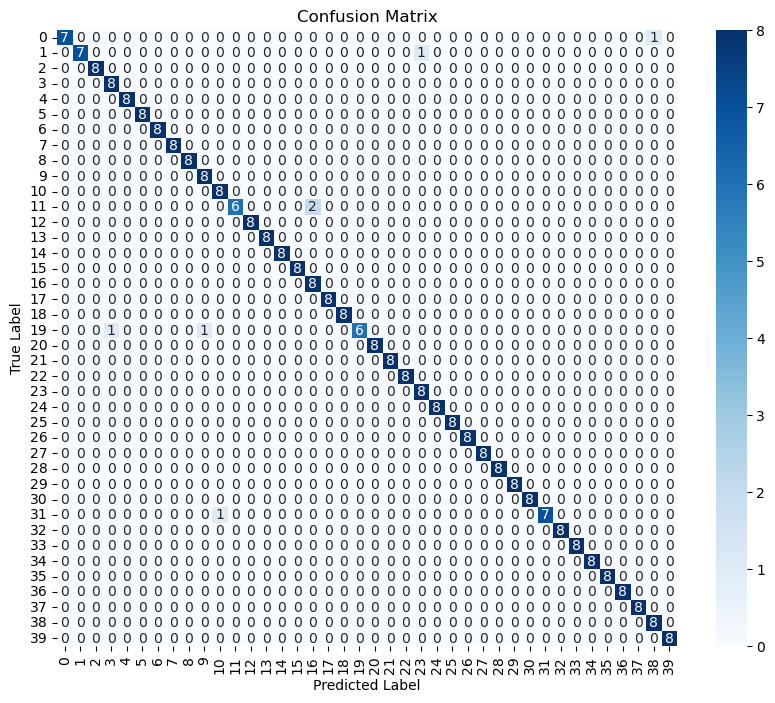

In [5]:
# KNN for 20m

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting

# Load the dataset from the CSV file
data = pd.read_csv('norm_newfocus20m.csv')  # Replace with the actual file name

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the data
balanced_data = balance_data(data)

# Split the data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the K-nearest neighbors classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # How to weigh the votes of each neighbor
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_knn = grid_search.best_estimator_
print(f"Best KNN Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_knn.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_knn.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Train Accuracy: 1.0000
Test Accuracy: 0.9821
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       0.88      1.00      0.93         7
          13   

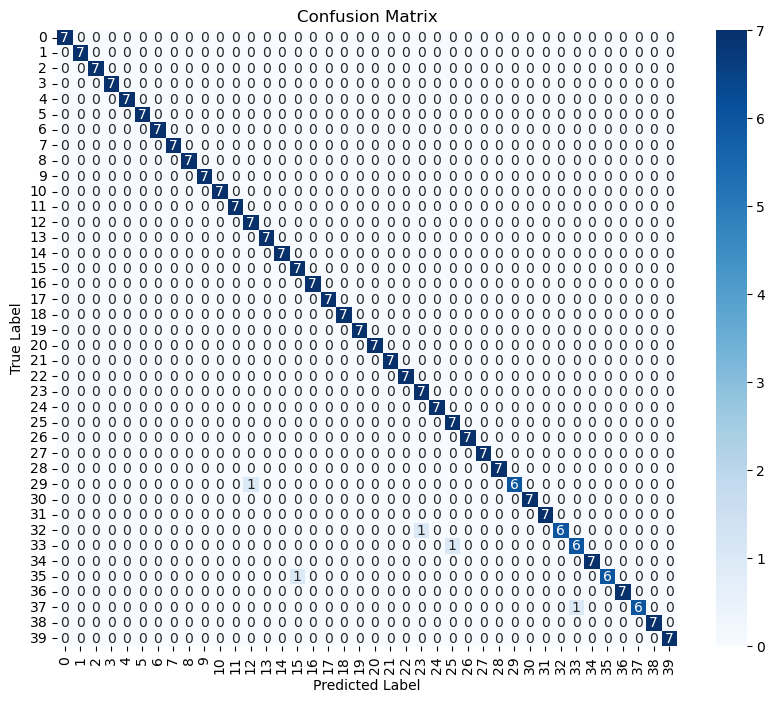

In [6]:
# KNN for 25m

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting

# Load the dataset from the CSV file
data = pd.read_csv('norm_newfocus25m.csv')  # Replace with the actual file name

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the data
balanced_data = balance_data(data)

# Split the data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the K-nearest neighbors classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # How to weigh the votes of each neighbor
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_knn = grid_search.best_estimator_
print(f"Best KNN Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_knn.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_knn.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Train Accuracy: 1.0000
Test Accuracy: 0.7607
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.81      0.81      0.81        16
           2       0.63      0.71      0.67        17
           3       0.70      0.94      0.80        17
           4       0.92      0.75      0.83        16
           5       0.67      0.38      0.48        16
           6       0.75      0.56      0.64        16
           7       0.84      0.94      0.89        17
           8       0.68      0.81      0.74        16
           9       0.88      0.94      0.91        16
          10       0.93      0.82      0.87        17
          11       0.82      0.88      0.85        16
          12       0.92      0.69      0.79        16
          13   

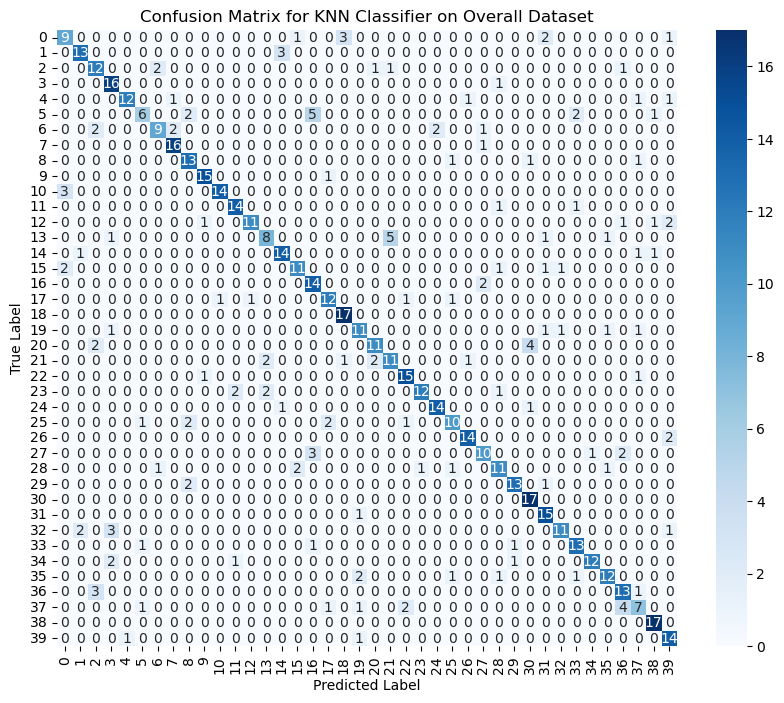

In [8]:
#KNN for overall data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting

# Load the datasets from the CSV files
data_15m = pd.read_csv('norm_newfocus15m.csv')
data_20m = pd.read_csv('norm_newfocus20m.csv')
data_25m = pd.read_csv('norm_newfocus25m.csv')

# Concatenate the three datasets
data = pd.concat([data_15m, data_20m, data_25m], ignore_index=True)

# Feature columns
feature_columns = ['R', 'G', 'B']

# Function to balance the data by downsampling each class to the minimum number of samples
def balance_data(data):
    min_count = data['tag'].value_counts().min()
    balanced_data = data.groupby('tag').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
    return balanced_data

# Balance the data
balanced_data = balance_data(data)

# Split the data into features and labels
X = balanced_data[feature_columns]
y = balanced_data['tag']

# Perform the train/test split in a stratified manner
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the K-nearest neighbors classifier
knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # How to weigh the votes of each neighbor
    'metric': ['euclidean', 'manhattan']  # Distance metric to use
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_knn = grid_search.best_estimator_
print(f"Best KNN Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_knn.fit(X_train_scaled, y_train)

# Predict on the train set
y_train_pred = best_knn.predict(X_train_scaled)

# Predict on the test set
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the classifier
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display the classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix for KNN Classifier on Overall Dataset")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()